# Exploratory Data Analysis

### Navigation
* [README](https://github.com/SelinaFischer/unmasking_hidden_cyber_threats_t5/blob/main/README.md)
* [Raw data](https://github.com/SelinaFischer/unmasking_hidden_cyber_threats_t5/tree/main/data/raw)
* [ETL pipeline](https://github.com/SelinaFischer/unmasking_hidden_cyber_threats_t5/blob/main/jupyter_notebooks/1.%20etl_data_prep.ipynb)
* [Hypothesis Validation](https://github.com/SelinaFischer/unmasking_hidden_cyber_threats_t5/blob/main/jupyter_notebooks/3.%20hypothesis_validation.ipynb)
* [Visualisation](https://github.com/SelinaFischer/unmasking_hidden_cyber_threats_t5/blob/main/jupyter_notebooks/4.%20visualisations.ipynb)

### Import libraries and load data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data adn check if it's loaded correctly
df = pd.read_csv('../data/cleaned/cleaned_train.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,log_src_bytes
0,0,tcp,ftp_data,SF,491,0,False,0,False,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,6.198479
1,0,udp,other,SF,146,0,False,0,False,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,4.990433
2,0,tcp,private,S0,0,0,False,0,False,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,0.000000
3,0,tcp,http,SF,232,8153,False,0,False,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,5.451038
4,0,tcp,http,SF,199,420,False,0,False,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,5.298317


### check for overall infomatin about the data 

In [4]:
# check for basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25184 entries, 0 to 25183
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25184 non-null  int64  
 1   protocol_type                25184 non-null  object 
 2   service                      25184 non-null  object 
 3   flag                         25184 non-null  object 
 4   src_bytes                    25184 non-null  int64  
 5   dst_bytes                    25184 non-null  int64  
 6   land                         25184 non-null  bool   
 7   wrong_fragment               25184 non-null  int64  
 8   urgent                       25184 non-null  bool   
 9   hot                          25184 non-null  int64  
 10  num_failed_logins            25184 non-null  int64  
 11  logged_in                    25184 non-null  bool   
 12  num_compromised              25184 non-null  int64  
 13  root_shell      

In [5]:
# Descriptive status
df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,num_compromised,su_attempted,num_root,num_file_creations,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,log_src_bytes
count,25184.000000,2.518400e+04,2.518400e+04,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,...,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000
mean,305.151009,2.433834e+04,3.492956e+03,0.023745,0.198102,0.001191,0.227922,0.001350,0.249921,0.014732,...,115.094346,0.519925,0.082513,0.147469,0.031854,0.285886,0.279896,0.117790,0.118807,3.234155
std,2686.976829,2.411188e+06,8.884481e+04,0.260262,2.154541,0.045425,10.419006,0.048793,11.502668,0.529686,...,110.649559,0.448949,0.187130,0.308410,0.110591,0.445361,0.446099,0.305877,0.317377,2.985165
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.806662
75%,0.000000,2.790000e+02,5.310000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,5.634790
max,42862.000000,3.817091e+08,5.151385e+06,3.000000,77.000000,4.000000,884.000000,2.000000,975.000000,40.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.760169


### Activity distribution

Class Distribution:
class
normal     13442
anomaly    11742
Name: count, dtype: int64


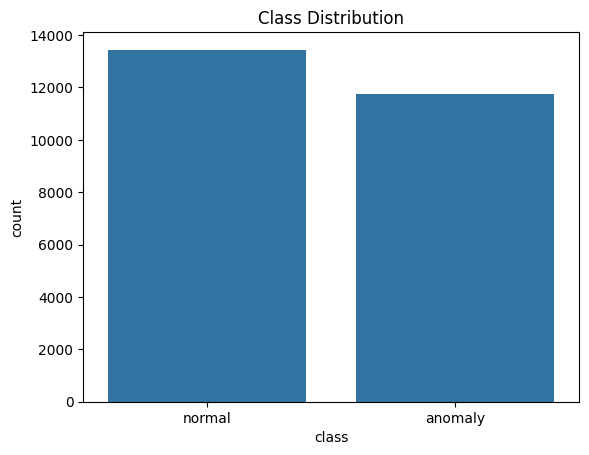

In [6]:
# Show class distribution
print("Class Distribution:")
print(df['class'].value_counts())  

# plot a graph
sns.countplot(data=df, x='class')
plt.title("Class Distribution")
plt.show()


This is the disctribution of normal activity and abnormal activity

### Correlation heatmap

In [ ]:
# class column contains whether the activity is normal or not
# Converting class into binary so that nomal or anormaly activity can be analysed in correlation matrix
df['class_numeric'] = df['class'].apply(lambda x: 1 if x == 'anomaly' else 0)
correlations = df.corr(numeric_only=True)['class_numeric'].sort_values(ascending=False)
print(correlations)

class_numeric                  1.000000
dst_host_srv_serror_rate       0.653691
dst_host_serror_rate           0.651031
serror_rate                    0.649933
srv_serror_rate                0.647747
count                          0.578729
dst_host_count                 0.368715
dst_host_srv_rerror_rate       0.256960
rerror_rate                    0.256732
dst_host_rerror_rate           0.256218
srv_rerror_rate                0.256113
dst_host_diff_srv_rate         0.238058
diff_srv_rate                  0.193665
wrong_fragment                 0.097619
dst_host_same_src_port_rate    0.092978
dst_host_srv_diff_host_rate    0.062882
duration                       0.050884
urgent                         0.006742
src_bytes                      0.005741
srv_count                      0.002296
land                           0.000603
num_failed_logins              0.000022
dst_bytes                     -0.010959
hot                           -0.012861
num_shells                    -0.013460


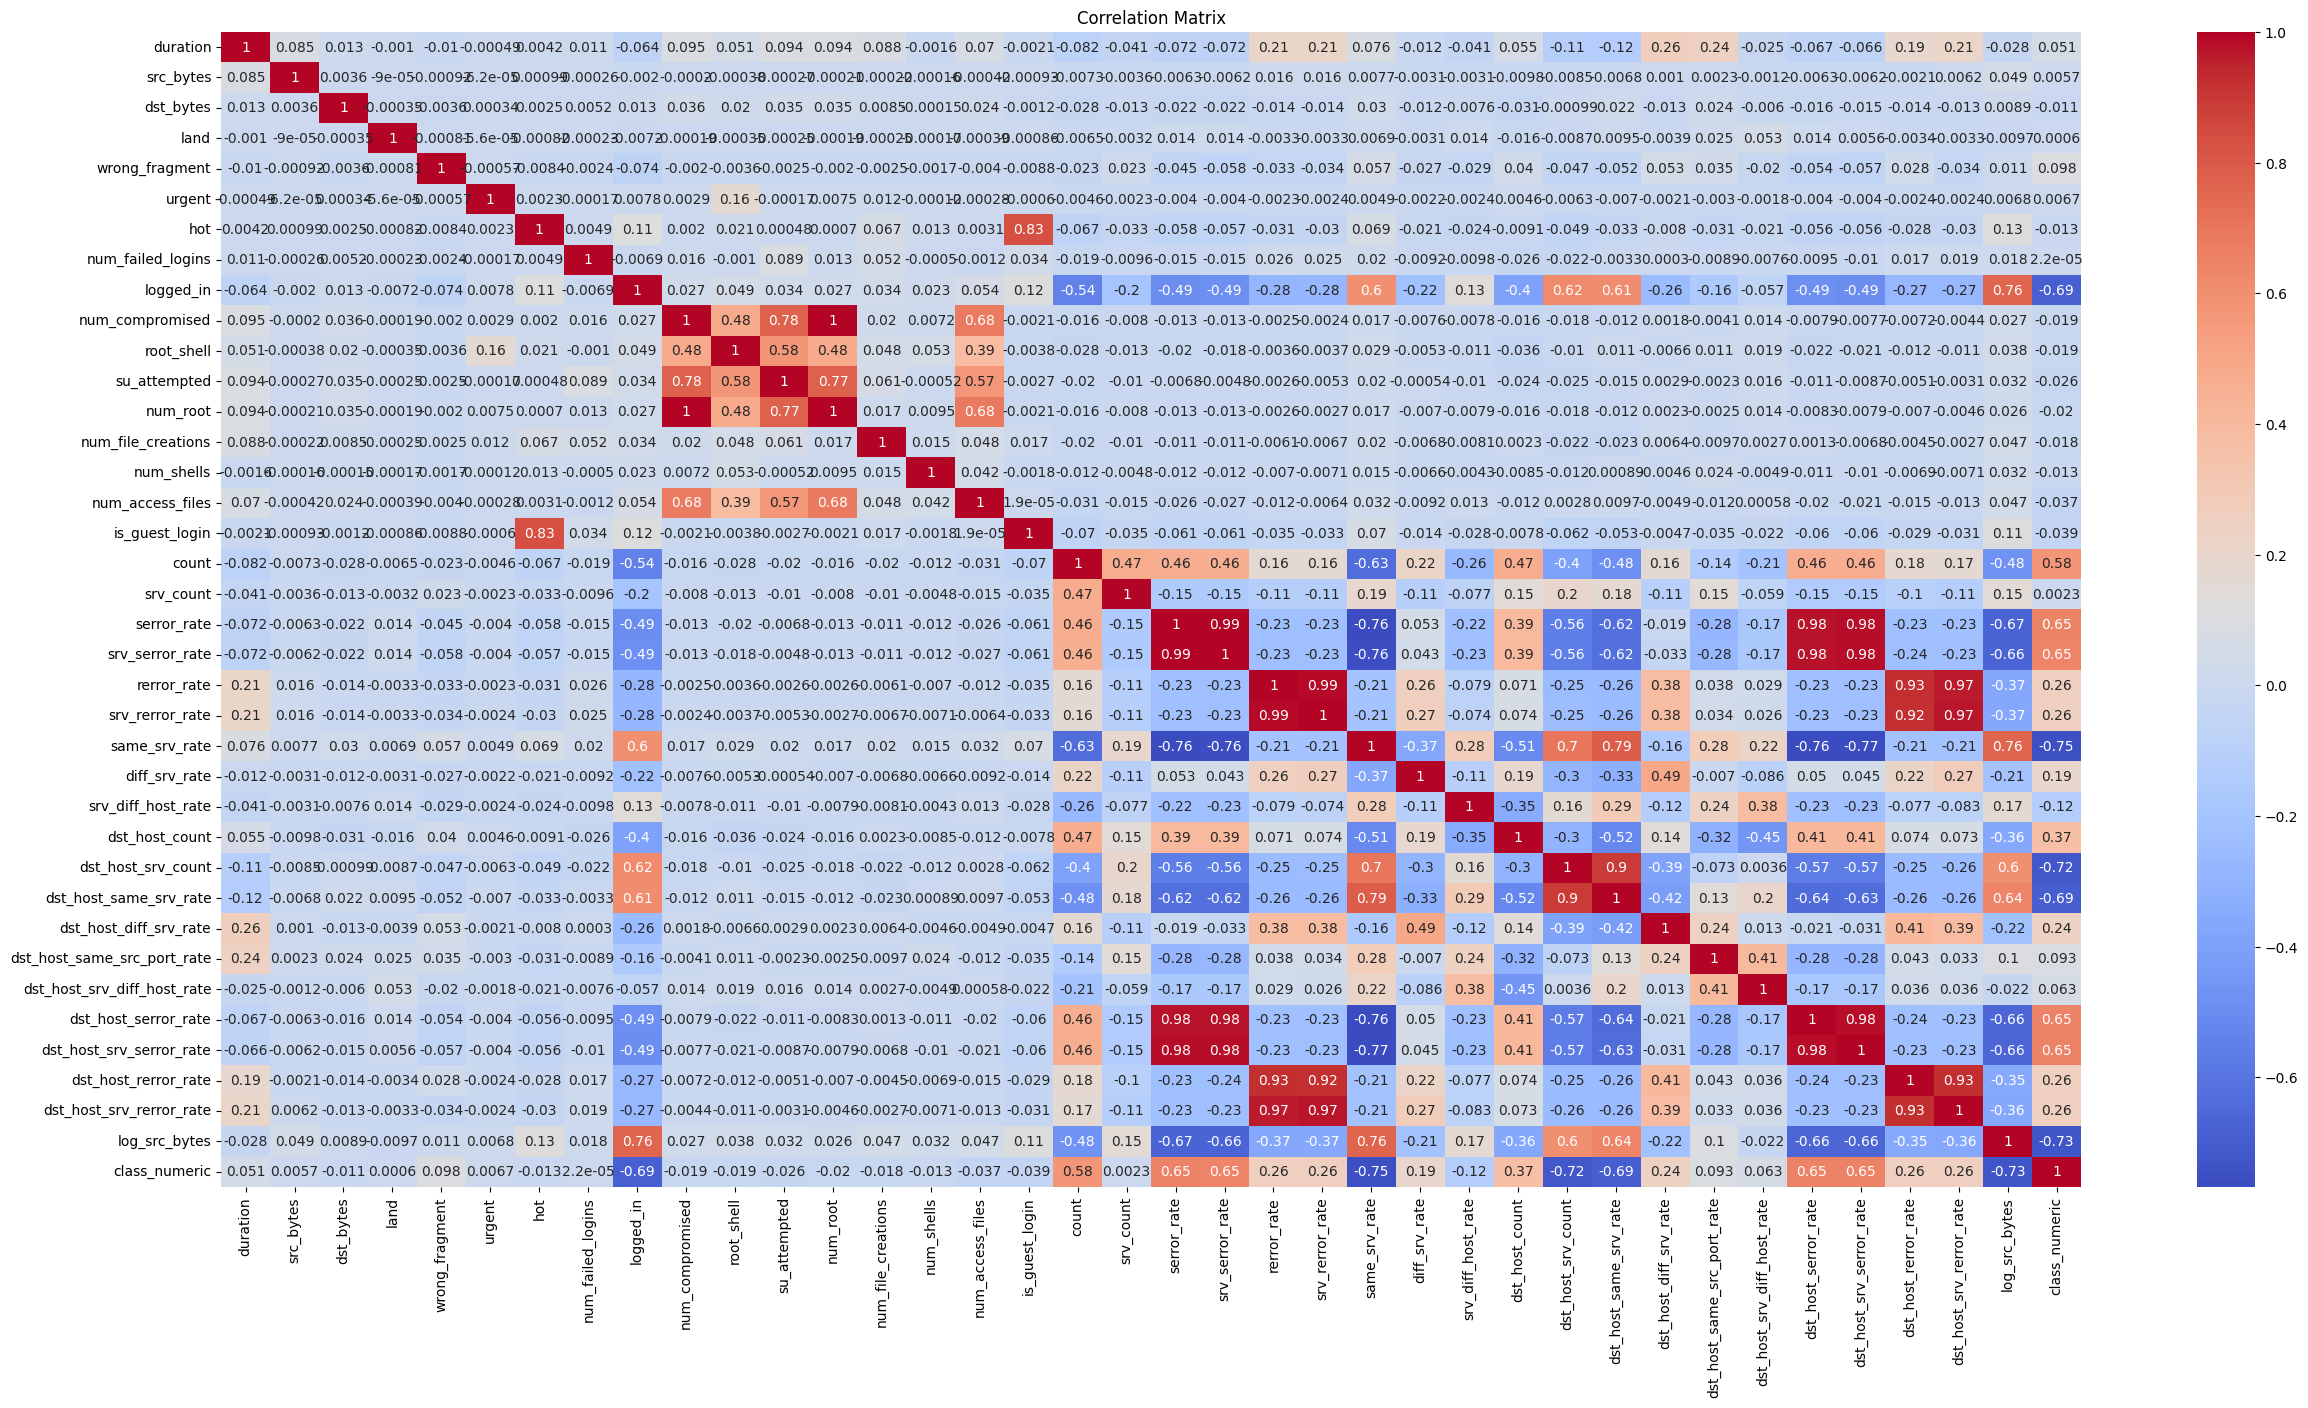

In [ ]:
# create correlation map
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

`count`, `serror_rate`,`srv_serror_rate`, `dst_host_serror_rate`,`dst_host_srv_rerrorr_rate`have high correlation to abnormal activities.